<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/Assignments/M7_AST_02_Intro_to_PySpark_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 2: Intro to PySpark

## Learning Objectives

At the end of the experiment, you will be able to

* interact with Spark using python
* understand Spark dataframes
* implement linear regression using PySpark

### Dataset

The dataset chosen for this assignment is [Ecommerce customers](https://www.kaggle.com/srolka/ecommerce-customers). The dataset is made up of 500 records and 8 columns. It has customer information, such as e-mail, address, and their color avatar. Then it also has numerical value columns.

* Avg Session Length: Average session of in-store style advice sessions
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Yearly Amount Spent

Here, we will be using the first four features to perform linear regression using spark and predict Yearly Amount Spent by each customer.

### Information

**Why do we need Spark?**

Spark is one of the latest technologies being used to quickly and easily handle Big Data. Spark is an open-source distributed computing framework that promises a clean and pleasurable experience similar to that of Pandas, while scaling to large data sets via a distributed architecture under the hood.

Apache Spark is a powerful cluster computing engine, therefore it is designed for fast computation of big data. Spark runs on Memory (RAM), and that makes the processing much faster than on Disk. It includes "MLlib" library to perform Machine Learning tasks using the Spark framework.

### Introduction

Apache Spark is known as a fast, easy to use and general engine for big data processing, with built-in modules for streaming, SQL, machine learning and graph processing. It’s well-known for its speed, ease of use, generality and the ability to run virtually everywhere. And even though Spark is one of the most asked tools for data engineers, also data scientists can benefit from Spark when doing exploratory data analysis, feature extraction, supervised learning and model evaluation.

Spark is a platform for cluster computing that lets you spread data and computations over clusters with multiple nodes (think of each node as a separate computer). Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computation are performed in parallel over the nodes in the cluster. It is a fact that parallel computation can make certain types of programming tasks much faster.

### Setup Steps:

In [47]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [48]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M7_AST_02_Intro_to_PySpark_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/ecommerce_customers_.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### PySpark

PySpark is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.

<figure>
<img src='https://cdn.iisc.talentsprint.com/CDS/Images/pyspark_components.png' width = 700 px/>
</figure>

**Spark SQL and DataFrame**

Spark SQL is a Spark module for structured data processing. It provides a programming abstraction called DataFrame and can also act as distributed SQL query engine.

**Streaming**

Running on top of Spark, the streaming feature in Apache Spark enables powerful interactive and analytical applications across both streaming and historical data, while inheriting Spark’s ease of use and fault tolerance characteristics.

**MLlib**

Built on top of Spark, MLlib is a scalable machine learning library that provides a uniform set of high-level APIs that help users create and tune practical machine learning pipelines.

**Spark Core**

Spark Core is the underlying general execution engine for the Spark platform that all other functionality is built on top of. It provides an RDD (Resilient Distributed Dataset) and in-memory computing capabilities.

#### Install PySpark

In [4]:
!pip install pyspark

#### Start a Spark Session

Spark session is a combined entry point of a Spark application, which came into implementation from Spark 2.0. It provides a way to interact with various spark’s functionality with a lesser number of constructs. Instead of having spark context, hive context, SQL context, now everything is encapsulated in a Spark session.

In [5]:
# Start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('LinearRegression').getOrCreate()
spark

### Data Processing using Pyspark

#### Loading data into PySpark

To load the dataset we will use the `read.csv` module.  The `inferSchema` parameter provided will enable Spark to automatically determine the data type for each column. Also, `header` and `sep` parameters are given as the dataset contains header, and values are separated using vertical bar.

In [6]:
df = spark.read.csv("ecommerce_customers_.csv", sep = "|", header=True, inferSchema = True)           # creating spark data frame

#### Data exploration with PySpark

* Display data types of dataframe columns

In [7]:
# Print the data types
df.dtypes

[('Email', 'string'),
 ('Address', 'string'),
 ('Avatar', 'string'),
 ('Avg Session Length', 'double'),
 ('Time on App', 'double'),
 ('Time on Website', 'double'),
 ('Length of Membership', 'double'),
 ('Yearly Amount Spent', 'double')]

* Display column details

In [8]:
# Print the Schema of the DataFrame
df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



* Display rows

In [9]:
df.show(5)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37.110597442120856|   4.104543202376424| 487.54750486747207|
|riverarebecca@gma...|1414 David Throug...|   

* Display total number of rows

In [10]:
df.count()

500

* Display column labels

In [11]:
df.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

* Display specific columns

In [12]:
columns = ["Email","Time on App","Time on Website"]
df.select(columns).show(5)

+--------------------+------------------+------------------+
|               Email|       Time on App|   Time on Website|
+--------------------+------------------+------------------+
|mstephenson@ferna...| 12.65565114916675| 39.57766801952616|
|   hduke@hotmail.com|11.109460728682564|37.268958868297744|
|    pallen@yahoo.com|11.330278057777512|37.110597442120856|
|riverarebecca@gma...|13.717513665142507| 36.72128267790313|
|mstephens@davidso...|12.795188551078114| 37.53665330059473|
+--------------------+------------------+------------------+
only showing top 5 rows



* Display the statistics of dataframe

In [13]:
df.describe().show()

+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|summary|            Email|             Address|     Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|  count|              500|                 500|        500|               500|               500|               500|                 500|                500|
|   mean|             NULL|                NULL|       NULL| 33.05319351819619|12.052487937166134| 37.06044542094859|   3.533461555915055|  499.3140382585909|
| stddev|             NULL|                NULL|       NULL|0.9925631110845354|0.9942156084725424|1.0104889067564033|  0.9992775024112585|   79.3147815497068|
|    min|aaron04@yahoo.com|0001 Mack MillNor..

* Display total distinct values in *Avatar* column

In [14]:
# Distinct value count
df.select('Avatar').distinct().count()

138

* Display count of distinct values in *Avatar* column

In [15]:
df.groupby('Avatar').count().show(10)

+-----------+-----+
|     Avatar|count|
+-----------+-----+
|ForestGreen|    2|
|    DimGray|    4|
|   SeaGreen|    4|
|       Aqua|    6|
|       Teal|    7|
| DodgerBlue|    3|
|  MintCream|    3|
|      Khaki|    2|
|  LightGray|    3|
|  LightBlue|    2|
+-----------+-----+
only showing top 10 rows



* Plot the count of distinct values in *Avatar* column

In [16]:
DF = df.groupby('Avatar').count().sort("count", ascending= False)
DF.show(8)

+------------+-----+
|      Avatar|count|
+------------+-----+
| GreenYellow|    7|
|        Teal|    7|
|   SlateBlue|    7|
|        Cyan|    7|
|   CadetBlue|    7|
|   PeachPuff|    6|
|LightSkyBlue|    6|
|      Purple|    6|
+------------+-----+
only showing top 8 rows



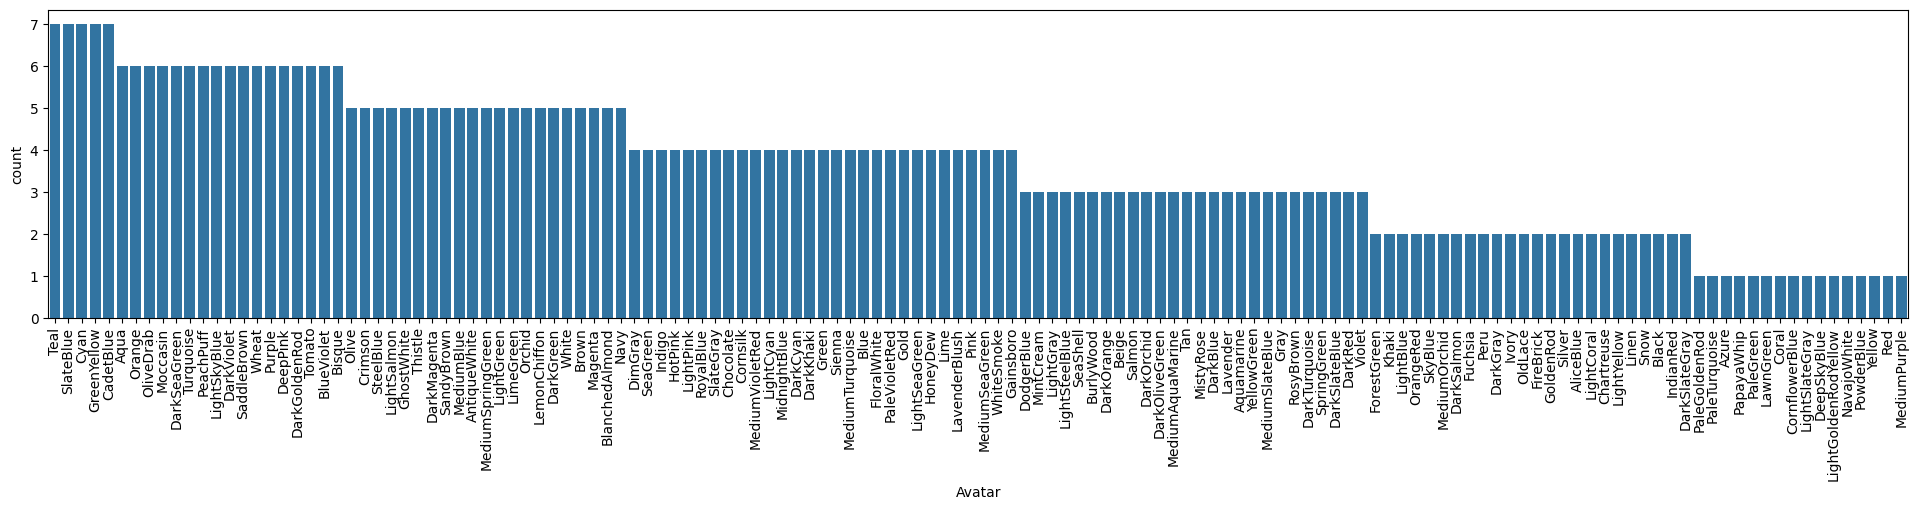

In [20]:
plt.figure(figsize= (24,4))
x = DF.toPandas()['Avatar']
y = DF.toPandas()['count']
sns.barplot(x=x, y=y)
plt.xticks(rotation= 90)
plt.show()

* Display average time spent on app by users having different *Avatar*

In [18]:
df.groupby('Avatar').avg().select(['Avatar', 'avg(Time on App)']).show(5)

+-----------+------------------+
|     Avatar|  avg(Time on App)|
+-----------+------------------+
|ForestGreen|11.801835104426386|
|    DimGray|12.013773141157184|
|   SeaGreen|11.352012316138753|
|       Aqua|12.207605304482167|
|       Teal| 11.77888239909872|
+-----------+------------------+
only showing top 5 rows



* Display the records where average time spent on website by user is greater than 37 minutes

In [21]:
df.filter(df['Time on Website'] > 37).show(5)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37.110597442120856|   4.104543202376424| 487.54750486747207|
|mstephens@davidso...|14023 Rodriguez P...|Med

* Display the minimum Yearly Amount Spent where average time spent on website by user is greater than 39 minutes

In [22]:
from pyspark.sql.functions import col, min
df.filter(col('Time on Website')>39).agg(min('Yearly Amount Spent')).show()

+------------------------+
|min(Yearly Amount Spent)|
+------------------------+
|      350.05820016384513|
+------------------------+



* Display the records where average time spent on app by user is greater than 12 minutes and average time spent on website is smaller than 37 minutes

In [23]:
from pyspark.sql.functions import col
df.filter((col('Time on App')>12) &(col('Time on Website') < 37)).show(10, truncate=False)

+-----------------------------+------------------------------------------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|Email                        |Address                                               |Avatar     |Avg Session Length|Time on App       |Time on Website   |Length of Membership|Yearly Amount Spent|
+-----------------------------+------------------------------------------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|riverarebecca@gmail.com      |1414 David ThroughwayPort Jason, OH 22070-1220        |SaddleBrown|34.30555662975554 |13.717513665142507|36.72128267790313 |3.120178782748092   |581.8523440352177  |
|alvareznancy@lucas.biz       |645 Martha Park Apt. 611Jeffreychester, MN 67218-7250 |FloralWhite|33.871037879341976|12.026925339755056|34.47687762925054 |5.493507201364199   |637.102447915074   |
|wrightpeter@ya

To know more about other `pyspark.sql.functions` operation click [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html).

### Linear Regression Model

Linear Regression model is one of the oldest and widely used machine learning approach which assumes a relationship between dependent and independent variables. It consists of the best fitting line through the scattered points on the graph and this best fitting line is known as the regression line.

#### Setting Up DataFrame for Model

For Spark to accept the data, it needs to be in the form of two columns ("labels", "features")

* Features are data points of all the attributes to be used for prediction
* Labels are output for each data point
* We will be predicting Label from Features

For the linear regression model, we need to import two modules from Pyspark i.e. Vector Assembler and Linear Regression. Vector Assembler is a transformer that assembles all the features into one vector from multiple columns that contain type double.

To know more about vector assembler click [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.VectorAssembler.html).

In [24]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [25]:
assembler = VectorAssembler(
                            inputCols= ["Avg Session Length", "Time on App", "Time on Website",'Length of Membership'],
                            outputCol= "features")       # features is the name of output columns which combines all the columns

In [26]:
output = assembler.transform(df)            # A new column 'features' will be created along with the existing columns
                                            # features column will include all the values combined in one list

In [27]:
output.show(10)

+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|               Email|             Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|            features|
+--------------------+--------------------+----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|mstephenson@ferna...|835 Frank TunnelW...|          Violet| 34.49726772511229| 12.65565114916675| 39.57766801952616|  4.0826206329529615|  587.9510539684005|[34.4972677251122...|
|   hduke@hotmail.com|4547 Archer Commo...|       DarkGreen| 31.92627202636016|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|[31.9262720263601...|
|    pallen@yahoo.com|24645 Valerie Uni...|          Bisque|33.000914755642675|11.330278057777512|37

In [29]:
output.select("features").show(10, truncate= False)          # displays only the features column (which includes all other column values in a list)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|[34.49726772511229,12.65565114916675,39.57766801952616,4.0826206329529615]  |
|[31.92627202636016,11.109460728682564,37.268958868297744,2.66403418213262]  |
|[33.000914755642675,11.330278057777512,37.110597442120856,4.104543202376424]|
|[34.30555662975554,13.717513665142507,36.72128267790313,3.120178782748092]  |
|[33.33067252364639,12.795188551078114,37.53665330059473,4.446308318351434]  |
|[33.871037879341976,12.026925339755056,34.47687762925054,5.493507201364199] |
|[32.02159550138701,11.366348309710526,36.68377615286961,4.685017246570912]  |
|[32.739142938380326,12.35195897300293,37.37335885854755,4.4342734348999375] |
|[33.98777289568564,13.386235275676436,37.534497341555735,3.2734335777477144]|
|[31.936548618448917,11.814128294972196,37.145168223

In [30]:
# Complete dataset is represented in 2 columns
final_data = output.select("features",'Yearly Amount Spent')

#### Splitting the data into Training and Test set

In [31]:
# Splitting the data in Train and Test set(70% training data, 30% testing data)
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [32]:
train_data.describe().show()

+-------+-------------------+
|summary|Yearly Amount Spent|
+-------+-------------------+
|  count|                336|
|   mean|  502.5371559469618|
| stddev|  81.25887935274355|
|    min| 256.67058229005585|
|    max|  765.5184619388373|
+-------+-------------------+



In [33]:
test_data.describe().show()

+-------+-------------------+
|summary|Yearly Amount Spent|
+-------+-------------------+
|  count|                164|
|   mean| 492.71057762875796|
| stddev|  74.98375089863218|
|    min|  282.4712457199145|
|    max|  744.2218671047146|
+-------+-------------------+



#### Create a Linear Regression Model object and fit on train data

In [34]:
regressor = LinearRegression(featuresCol="features", labelCol="Yearly Amount Spent")

#Learn to fit the model from training set
model = regressor.fit(train_data)

#### Predicting the Test set results

In [35]:
predict = model.transform(test_data)

predict.select(predict.columns[:]).show(10)

+--------------------+-------------------+------------------+
|            features|Yearly Amount Spent|        prediction|
+--------------------+-------------------+------------------+
|[30.3931845423455...|  319.9288698031936|330.53778849411265|
|[30.4925366965402...|  282.4712457199145| 286.6515044795042|
|[30.5743636841713...| 442.06441375806565| 440.9259666238718|
|[30.7377203726281...|  461.7807421962299| 450.4880069707467|
|[31.1280900496166...|  557.2526867470547|  563.889763295944|
|[31.2681042107507...|  423.4705331738239| 427.1715132635636|
|[31.2834474760581...|  591.7810894256675|  569.602166735928|
|[31.3123495994443...|  463.5914180279406|443.28572046828845|
|[31.3584771924370...|  495.1759504494754| 490.7074333478836|
|[31.4459724827577...| 484.87696493512857| 481.0006742043529|
+--------------------+-------------------+------------------+
only showing top 10 rows



#### Evaluating Model Performance

In [36]:
metrics = model.evaluate(test_data)                             # Using evaluate method we can verify our model's performance

print('Mean absolute error: {}'.format(metrics.meanAbsoluteError))
print('Root mean squared error: {}'.format(metrics.rootMeanSquaredError))
print('R_squared value: {}'.format(metrics.r2))

Mean absolute error: 7.725713224170371
Root mean squared error: 9.560803273597191
R_squared value: 0.9836427351632553


To know more about other operations in pyspark click [here](https://cdn.iisc.talentsprint.com/CDS/cheatSheet_pyspark.pdf).

In [39]:
# Display records where average time spent on app by user is greater than 13 minutes
df.filter(df['Time on App'] > 13).count()

92

### Please answer the questions below to complete the experiment:




In [40]:
# @title In the above given spark dataframe (df), what is the total number of records where average time spent on app by user is greater than 13 minutes? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "92" #@param ["","90","91", "92"]

In [41]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [42]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Sufficient for beginners" #@param {type:"string"}


In [43]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [44]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [45]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [46]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7187
Date of submission:  08 Jan 2025
Time of submission:  16:43:42
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
